# From a different angle 

## Learning Outcomes

<li> Describe the action of the $RX$ gate and its matrix representation.

<li> Describe the action of the $RY$ gate and its matrix representation

<li> Represent qubit states in $3$ dimensional space using Bloch Sphere




Author: [Monit Sharma](https://github.com/MonitSharma)
LinkedIn: [Monit Sharma](https://www.linkedin.com/in/monitsharma/)
Twitter: [@MonitSharma1729](https://twitter.com/MonitSharma1729)
Medium : [MonitSharma](https://medium.com/@_monitsharma)

Qubits bear a special relationship with $3$ dimensional space. We saw in the previous node that the most general form of a qubit is:

$$ |\psi⟩ = a|0⟩ + b e^{\iota \phi}|1⟩$$

where $a$ and $b$ are two real numbers. The normalization requirements of the state also tell us something that $a^2 + b^2 = 1$. We can make this natural association of $a$ and $b$ to two trigonometric functions $a = \cos (\theta/2) $ and $b = \sin (\theta/2)$.

$$ |\psi⟩ = \cos \bigg(\frac{\theta}{2}\bigg) |0⟩ + \sin \bigg(\frac{\theta}{2}\bigg)e^{\iota \phi } |1⟩$$


----

We have a single-qubit state parameterized by two angles $\theta$ and $\phi$ with length $1$. This suggests that we could make associations between qubit sttaes and unit vectors in $3-$ dimensional space expressed in *spherical coordinates*




### Bloch Sphere

The Bloch sphere is a spherical representation of the state of a single qubit. Each qubit state vector corresponds to a *real* vector on the surface of the sphere in a $3$ dimensional space.




## Exercise

We know how to change the phase of the amplitudes, but how do we change their magnitude? 

In addition to $RZ$ we also have $RX$ and $RY$. These are available in PennyLabe as `qml.RX` and `qml.RY`



### Exercise I.6.1

Write a QNode that applies `qml.RX` with an angle of $\pi$ to one of the computational basis states. WHat operation is this?

In [1]:
%pip install pennylane
import pennylane as qml
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 107.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 103.9 MB/s eta 0:00:00


In [2]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_rx_pi(state):
    """Apply an RX gate with an angle of \pi to a particular basis state.
    
    Args:
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.
    
    Returns:
        array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)
        
        

    ##################
    # YOUR CODE HERE #
    ##################
    qml.RX(np.pi,wires=0)

    # APPLY RX(pi) AND RETURN THE STATE

    return qml.state()

print(apply_rx_pi(0))
print(apply_rx_pi(1))

[6.123234e-17+0.j 0.000000e+00-1.j]
[0.000000e+00-1.j 6.123234e-17+0.j]


For this special case $RX(\pi) = X$ up to a global phase of $-\iota$ . But what does $RX$ do more generally?

### Exercise I.6.2
The matrix representation of $RX$ is 

$$\begin{align}\begin{aligned}\newcommand{\th}{\frac{\theta}{2}}\\\begin{split}RX(\theta) = \exp\left(-i \th X\right) =
    \begin{pmatrix}
        \cos{\th}   & -i\sin{\th} \\
        -i\sin{\th} & \cos{\th}
    \end{pmatrix}\end{split}\end{aligned}\end{align}
$$

How does this affect the amplitudes when we apply it to a quantum state? 

----

Implement a QNode that applies the `qml.RX` operation with parameter $\theta$ to a specified basis state



In [11]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


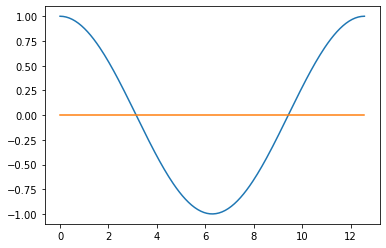

In [12]:
dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def apply_rx(theta, state):
    """Apply an RX gate with an angle of theta to a particular basis state.
    
    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.
    
    Returns:
        array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################
    qml.RX(theta, wires=0)

    # APPLY RX(theta) AND RETURN THE STATE

    return qml.state()

# Code for plotting
angles = np.linspace(0, 4*np.pi, 200)
output_states = np.array([apply_rx(t, 0) for t in angles])

plt.plot(angles, output_states)



Both the matrix representation and plot show that

$$ RX(θ)|0⟩ = \cos (θ/2) |0⟩ - ι \sin (θ/2) |1⟩$$

The way the operation acts on the amplitude is periodic, and is described by simple trigonometric functions.

### Exercise I.6.3 

Repeat the above exercise, but using `qml.RY`. From the amplitudes you obtain for $RY|0⟩$ 

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


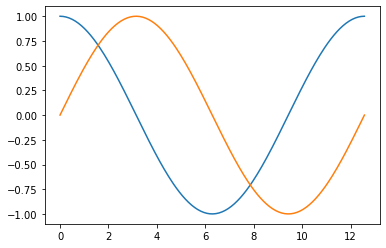

In [13]:
dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def apply_ry(theta, state):
    """Apply an RY gate with an angle of theta to a particular basis state.
    
    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.
    
    Returns:
        array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################
    qml.RY(theta,wires=0)

    # APPLY RY(theta) AND RETURN THE STATE

    return qml.state()

# Code for plotting
angles = np.linspace(0, 4*np.pi, 200)
output_states = np.array([apply_ry(t, 0) for t in angles])

plt.plot(angles, output_states)

Completing the previous exercise shows that $RY$ is quite similar to $RX$ and allows us to adjust the relative sizes of the amplitudes, but without the complex portion.

$$ \begin{align}\begin{aligned}\newcommand{\th}{\frac{\theta}{2}}\\\begin{split}RY(\theta) = \exp\left(-i \th Y\right) =
    \begin{pmatrix}
        \cos{\th} & -\sin{\th} \\
        \sin{\th} & \cos{\th}
    \end{pmatrix}\end{split}\end{aligned}\end{align}
$$

and its action on the basis states is

$$ RY(θ) |0⟩ = \cos (θ/2) |0⟩ + \sin (θ/2) |1⟩$$

Finally hust like $RX$ and $RZ$ there is a special case where $θ = Π$ the $Y$ gate which is implemented in PennyLane as `qml.PauliY`

